In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
n = 196591

In [3]:
clusters = pd.read_csv('answer.txt', sep = '\n', header = None, names = ['exemplar'])
clusters["user"] = pd.Series(range(n))

In [4]:
clusters_sizes = clusters['exemplar'].value_counts()
print('Number of clusters:', clusters_sizes.count())
print('Number of clusters of size 1:', np.sum(clusters_sizes == 1))

Number of clusters: 56532
Number of clusters of size 1: 4793


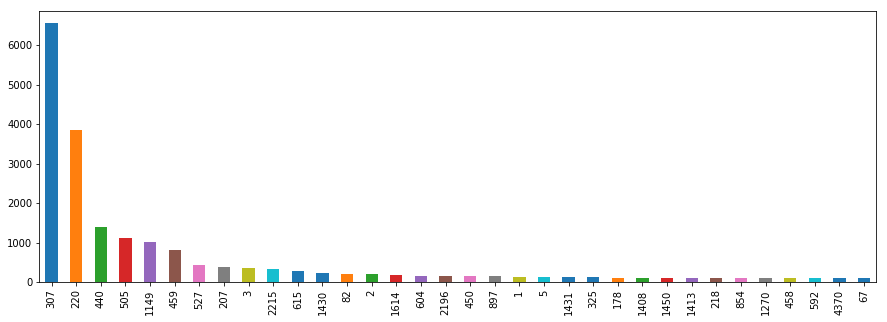

In [5]:
clusters_sizes[clusters_sizes >= 100].plot(kind = 'bar', figsize = (15, 5))

Number of clusters 1524


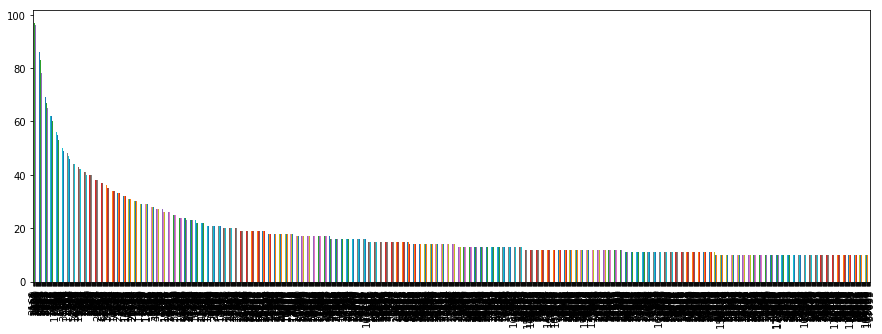

In [6]:
from10to100 = clusters_sizes[(clusters_sizes < 100) & (clusters_sizes >= 10)]
print('Number of clusters', from10to100.count())
from10to100.plot(kind = 'bar', figsize = (15, 5))

In [7]:
below10 = clusters_sizes[(clusters_sizes < 10)]
clusters_sizes[(clusters_sizes < 10)].count()

54974

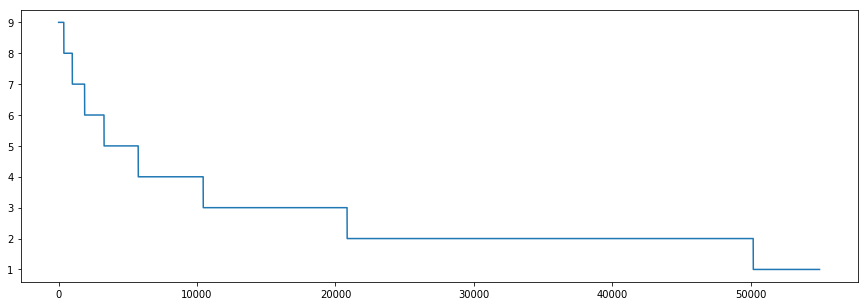

In [8]:
plt.figure(figsize = (15, 5))
plt.plot(range(len(below10)), below10)
plt.show()

In [9]:
checkins = pd.read_csv('Gowalla_totalCheckins.txt', sep = '\t', header = None)
checkins = checkins[[0, 4]]
checkins.columns = ['user', 'location']
users = np.unique(checkins['user'])

In [10]:
data = pd.merge(checkins, clusters, left_on = ['user'], right_on = ['user'])

In [11]:
def get_top_checkins(x):
    top = x['location'].value_counts().iloc[:10].index.values
    return pd.Series(top)

top10 = data.groupby('exemplar').apply(get_top_checkins)

In [13]:
users_train, users_test = train_test_split(users)
data_test = data[np.in1d(data['user'], users_test)]

countCorrect = 0
total = 0

for user in users_test:
    top_locations = top10.loc[clusters.loc[user]['exemplar']]
    users_locations = data_test[data_test['user'] == user]['location']
    
    correctAnswers = top_locations.isin(users_locations)
    
    total += 10
    countCorrect += np.sum(correctAnswers)
    
print(countCorrect / total * 100)

42.84353639861054
